 # Transport for London Cycle Data Exploration

 ## Dataset
 The data was provided from TFL and was retrieved from Kaggle: https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset
 The dataset counts the number of journeys made per hour in each day of 2015-2017.
 There are 17414 rows.

In [92]:
import urllib.request
from pathlib import Path

data_path = Path.cwd().parent / "data"
base_url = "https://cycling.data.tfl.gov.uk/usage-stats/"
urls = [
    "280JourneyDataExtract25Aug2021-31Aug2021.csv",
    "281JourneyDataExtract01Sep2021-07Sep2021.csv",
    "282JourneyDataExtract08Sep2021-14Sep2021.csv",
    "283JourneyDataExtract15Sep2021-21Sep2021.csv",
    "284JourneyDataExtract22Sep2021-28Sep2021.csv",
]
for url in urls:
    print(url)
    urllib.request.urlretrieve(base_url + url, (data_path / url.split("/")[-1]))


280JourneyDataExtract25Aug2021-31Aug2021.csv
281JourneyDataExtract01Sep2021-07Sep2021.csv
282JourneyDataExtract08Sep2021-14Sep2021.csv
283JourneyDataExtract15Sep2021-21Sep2021.csv
284JourneyDataExtract22Sep2021-28Sep2021.csv


In [94]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

In [129]:
dfs = []
for filename in urls:
    print(filename)
    dfs.append(pd.read_csv(data_path / filename))
df = pd.concat(dfs)
df


280JourneyDataExtract25Aug2021-31Aug2021.csv
281JourneyDataExtract01Sep2021-07Sep2021.csv
282JourneyDataExtract08Sep2021-14Sep2021.csv
283JourneyDataExtract15Sep2021-21Sep2021.csv
284JourneyDataExtract22Sep2021-28Sep2021.csv


,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,111690870,1140,10961,25/08/2021 10:59,701,"Vicarage Crescent, Battersea",25/08/2021 10:40,624,"Courland Grove, Wandsworth Road"
1,111773575,1080,19301,27/08/2021 13:21,701,"Vicarage Crescent, Battersea",27/08/2021 13:03,624,"Courland Grove, Wandsworth Road"
2,111918762,1080,12554,31/08/2021 10:27,701,"Vicarage Crescent, Battersea",31/08/2021 10:09,624,"Courland Grove, Wandsworth Road"
3,111732591,1140,7454,26/08/2021 11:21,701,"Vicarage Crescent, Battersea",26/08/2021 11:02,624,"Courland Grove, Wandsworth Road"
4,111882007,600,13074,30/08/2021 10:03,698,"Shoreditch Court, Haggerston",30/08/2021 09:53,399,"Brick Lane Market, Shoreditch"
...,...,...,...,...,...,...,...,...,...
290926,112954602,10380,5202,25/09/2021 11:17,53,"Grafton Street, Mayfair",25/09/2021 08:24,841,"Tower Wharf, Bermondsey"
290927,112963635,1620,7273,25/09/2021 12:38,562,"Bury Place, Holborn",25/09/2021 12:11,841,"Tower Wharf, Bermondsey"
290928,112968965,960,19299,25/09/2021 13:55,297,"Geraldine Street, Elephant & Castle",25/09/2021 13:39,841,"Tower Wharf, Bermondsey"
290929,113082488,240,17684,28/09/2021 08:15,130,"Tower Gardens , Tower",28/09/2021 08:11,841,"Tower Wharf, Bermondsey"


In [130]:
df["Start Date"] = pd.to_datetime(df["Start Date"], format="%d/%m/%Y %H:%M")
df["End Date"] = pd.to_datetime(df["End Date"], format="%d/%m/%Y %H:%M")
df["Start Time"] = df["Start Date"].dt.hour + df["Start Date"].dt.minute / 60
df["Week Day"] = df["Start Date"].dt.weekday

<AxesSubplot:ylabel='Frequency'>

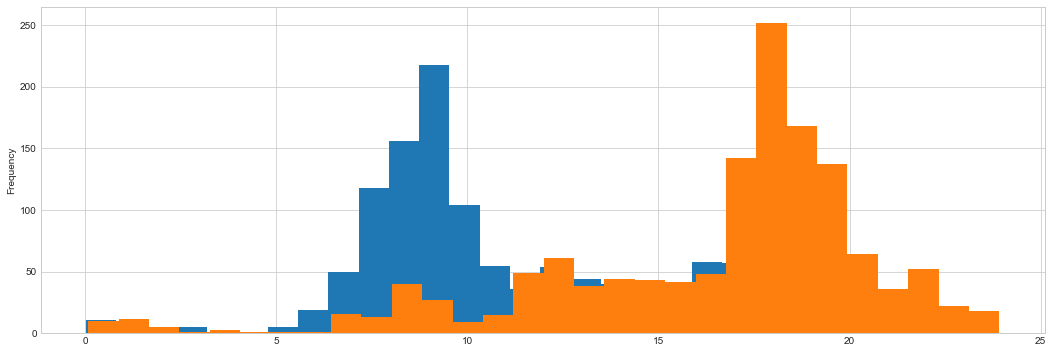

In [131]:
fig, ax = plt.subplots(figsize=(18, 6))
df.loc[df["Week Day"].isin(range(0, 6)) & (df["EndStation Id"] == 175)][
    "Start Time"
].plot(kind="hist", bins=30, ax=ax)

df.loc[df["Week Day"].isin(range(0, 6)) & (df["StartStation Id"] == 175)][
    "Start Time"
].plot(kind="hist", bins=30, ax=ax)


In [133]:
df_station = df.loc[
    (df["EndStation Id"] == 175) | (df["StartStation Id"] == 175)
].copy()
df_station["count_change"] = (df_station["EndStation Id"] == 175) * 1 - (
    df_station["StartStation Id"] == 175
) * 1
df_station["Change Date"] = df_station["Start Date"]
df_station.loc[
    df_station["EndStation Id"] == 175, "Change Date"
] = df_station.loc[df_station["EndStation Id"] == 175, "End Date"]
df_station = df_station.sort_values("Change Date")
df_station["cumulative_change"] = df_station["count_change"].cumsum()
df_station

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Start Time,Week Day,count_change,Change Date,cumulative_change
86484,111682792,1200,2313,2021-08-25 06:51:00,175,"Worship Street, Shoreditch",2021-08-25 06:31:00,787,"Timber Lodge, Queen Elizabeth Olympic Park",6.516667,2,1,2021-08-25 06:51:00,1
160066,111683325,240,2313,2021-08-25 07:04:00,127,"Wood Street, Guildhall",2021-08-25 07:00:00,175,"Worship Street, Shoreditch",7.000000,2,-1,2021-08-25 07:00:00,0
187324,111683578,420,3061,2021-08-25 07:18:00,175,"Worship Street, Shoreditch",2021-08-25 07:11:00,365,"City Road, Angel",7.183333,2,1,2021-08-25 07:18:00,1
59615,111683675,300,7125,2021-08-25 07:19:00,175,"Worship Street, Shoreditch",2021-08-25 07:14:00,779,"Houndsditch, Aldgate",7.233333,2,1,2021-08-25 07:19:00,2
127768,111683832,420,3503,2021-08-25 07:27:00,175,"Worship Street, Shoreditch",2021-08-25 07:20:00,328,"New North Road 2, Hoxton",7.333333,2,1,2021-08-25 07:27:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73646,113109669,480,11737,2021-09-28 21:34:00,253,"Shoreditch Park, Hoxton",2021-09-28 21:26:00,175,"Worship Street, Shoreditch",21.433333,1,-1,2021-09-28 21:26:00,57
114734,113109752,1140,17659,2021-09-28 21:58:00,763,"Mile End Park Leisure Centre, Mile End",2021-09-28 21:39:00,175,"Worship Street, Shoreditch",21.650000,1,-1,2021-09-28 21:39:00,56
96091,113110003,180,17769,2021-09-28 22:29:00,508,"Fournier Street, Whitechapel",2021-09-28 22:26:00,175,"Worship Street, Shoreditch",22.433333,1,-1,2021-09-28 22:26:00,55
4964,113110066,480,17046,2021-09-28 22:51:00,17,"Hatton Wall, Holborn",2021-09-28 22:43:00,175,"Worship Street, Shoreditch",22.716667,1,-1,2021-09-28 22:43:00,54


<AxesSubplot:xlabel='Start Date'>

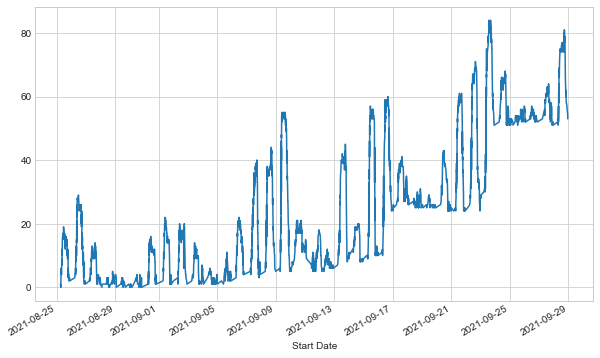

In [134]:
df_station.set_index("Start Date").loc[:, "cumulative_change"].plot(
    figsize=(10, 6)
)

2021-09-20
2021-09-27


<AxesSubplot:xlabel='Start Date'>

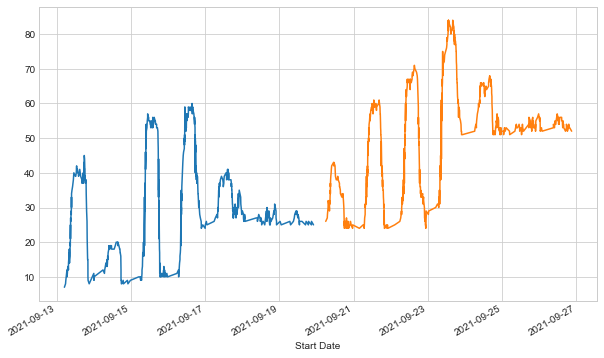

In [135]:
import datetime
start_date = datetime.date(2021,9,20)
print(start_date)
print(start_date+datetime.timedelta(7))
# df_station.set_index('Start Date').loc[start_date:start_date+datetime.timedelta(7),'cumulative_change'].plot(figsize=(10,6))
df_station.set_index('Start Date').loc['2021-09-13':'2021-09-19','cumulative_change'].plot(figsize=(10,6))
df_station.set_index('Start Date').loc['2021-09-20':'2021-09-26','cumulative_change'].plot(figsize=(10,6))
# df_station.set_index('Start Date').loc['2021-09-27':'2021-10-03','cumulative_change'].plot(figsize=(10,6))


In [118]:
df_station.loc[df_station['Week Day']==0]#,'cumulative_change']
# .plot(figsize=(10,6))

# capacity = 51

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Start Time,Week Day,count_change,cumulative_change
92345,112152515,600,15297,06/09/2021 06:45,175,"Worship Street, Shoreditch",2021-09-06 06:35:00,574,"Eagle Wharf Road, Hoxton",6.583333,0,1,2
258386,112152611,660,2176,06/09/2021 06:51,175,"Worship Street, Shoreditch",2021-09-06 06:40:00,170,"Hardwick Street, Clerkenwell",6.666667,0,1,3
79351,112153128,840,16463,06/09/2021 07:20,175,"Worship Street, Shoreditch",2021-09-06 07:06:00,14,"Belgrove Street , King's Cross",7.100000,0,1,4
149503,112153181,900,7084,06/09/2021 07:23,175,"Worship Street, Shoreditch",2021-09-06 07:08:00,253,"Shoreditch Park, Hoxton",7.133333,0,1,5
53602,112152865,1800,18099,06/09/2021 07:23,175,"Worship Street, Shoreditch",2021-09-06 06:53:00,277,"Kensington Church Street, Kensington",6.883333,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17193,111904766,1980,5850,30/08/2021 19:27,175,"Worship Street, Shoreditch",2021-08-30 18:54:00,313,"Wells Street, Fitzrovia",18.900000,0,1,54
226037,111905913,180,8778,30/08/2021 19:31,175,"Worship Street, Shoreditch",2021-08-30 19:28:00,122,"Norton Folgate, Liverpool Street",19.466667,0,1,55
79582,111906017,600,8778,30/08/2021 19:42,200,"LMU Commercial Road, Whitechapel",2021-08-30 19:32:00,175,"Worship Street, Shoreditch",19.533333,0,-1,54
201200,111906016,1500,17459,30/08/2021 19:57,252,"Jubilee Gardens, South Bank",2021-08-30 19:32:00,175,"Worship Street, Shoreditch",19.533333,0,-1,53


<AxesSubplot:xlabel='Start Time', ylabel='cumulative_change'>

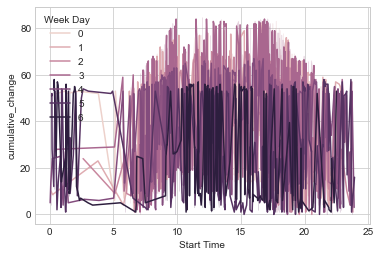

In [115]:
import seaborn as sns

sns.lineplot(x="Start Time", y="cumulative_change",
             hue="Week Day",
             data=df_station)

# df_station.set_index('Start Time').loc[df_station['Week Day']==0,'cumulative_change'].plot(figsize=(10,6))


<AxesSubplot:xlabel='Start Date'>

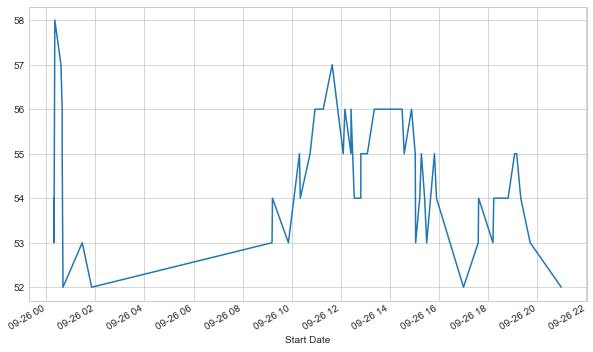

In [112]:
df_station.set_index('Start Date').loc['2021-09-26','cumulative_change'].plot(figsize=(10,6))
